# Setting dtreeviz element colors

The dtreeviz library uses colorblind-friendly pastel colors by default, but these might not look great when projected or you might simply want to display colors differently.

To jump right into the examples use this Colab notebook link:

https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/colors.ipynb

If you look in [colors.py](https://github.com/parrt/dtreeviz/blob/master/dtreeviz/colors.py), you will see the default colors:

```
color_blind_friendly_colors = [
    None,  # 0 classes
    None,  # 1 class
    ['#FEFEBB', '#a1dab4'],  # 2 classes
    ['#FEFEBB', '#D9E6F5', '#a1dab4'],  # 3 classes
    ['#FEFEBB', '#D9E6F5', '#a1dab4', LIGHTORANGE],  # 4
    ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', LIGHTORANGE],  # 5
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#2c7fb8', LIGHTORANGE, '#f46d43'],  # 6
    ['#FEFEBB', '#c7e9b4', '#7fcdbb', '#41b6c4', '#225ea8', '#fdae61', '#f46d43'],  # 7
    ['#FEFEBB', '#edf8b1', '#c7e9b4', '#7fcdbb', '#1d91c0', '#225ea8', '#fdae61', '#f46d43'],  # 8
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', BLUE, DARKBLUE, LIGHTORANGE, '#fdae61', '#f46d43'],  # 9
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', BLUE, DARKBLUE, LIGHTORANGE, '#fdae61', '#f46d43', '#d73027']  # 10
]
```

You can change many of the elements of the visualized trees using one of the dictionary names in `COLORS`:

```
COLORS = {'scatter_edge': GREY,
          'scatter_marker': BLUE,
          'scatter_marker_alpha': 0.5,
          'tesselation_alpha': 0.3,
          'tesselation_alpha_3D': 0.5,
          'split_line': GREY,
          'mean_line': '#f46d43',
          'axis_label': GREY,
          'title': GREY,
          'legend_title': GREY,
          'legend_edge': GREY,
          'edge': GREY,
          'color_map_min': '#c7e9b4',
          'color_map_max': '#081d58',
          'classes': color_blind_friendly_colors,
          'rect_edge': GREY,
          'text': GREY,
          'highlight': HIGHLIGHT_COLOR,
          'wedge': WEDGE_COLOR,
          'text_wedge': WEDGE_COLOR,
          'arrow': GREY,
          'node_label': GREY,
          'tick_label': GREY,
          'leaf_label': GREY,
          'pie': GREY,
          'hist_bar': LIGHTBLUE
          }
```

The idea is that you will pass in a `colors` dictionary as an argument to the various library functions.
 
Using the Iris classification data set, here's how to play with the colors for a classifier partitioning.

In [6]:
from dtreeviz.trees import *
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

%config InlineBackend.figure_format = 'svg'

In [7]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [8]:
def show_iris(colors=None):
    iris = load_iris()
    X = iris.data
    X = X[:,2].reshape(-1,1) # petal length (cm)
    y = iris.target
    len(X), len(y)

    feature_c_univar = "petal length (cm)"
    target_c_univar = "iris"
    class_names_univar = list(iris.target_names)
    
    dtc_univar = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
    dtc_univar.fit(X, y)
    
    fig, ax = plt.subplots(1, 1, figsize=(6,2))
    ctreeviz_univar(dtc_univar, X, y, 
                feature_names=feature_c_univar, target_name=target_c_univar, class_names=class_names_univar,
                nbins=40, gtype='strip',
                show={'splits','title'},
                colors=colors, ax=ax)

Here's what the default partitioning looks like:

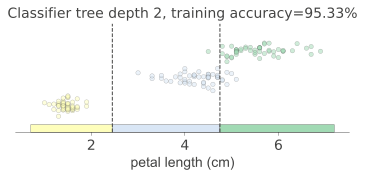

In [9]:
show_iris()

 Let's change the dashed lines to orange and the thin border of the scatter points to blue:

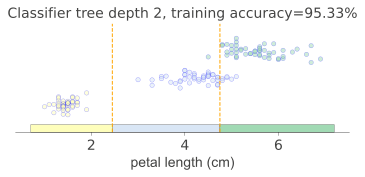

In [10]:
show_iris(colors={'scatter_edge': 'blue', 'split_line':'orange'})

Let's look at the decision tree plot:

In [11]:
def show_iris_dtree(colors=None):
    clas = tree.DecisionTreeClassifier(max_depth=2)  
    iris = load_iris()
    X_train = iris.data
    y_train = iris.target
    clas.fit(X_train, y_train)

    return dtreeviz(clas, 
                    X_train,
                    y_train,
                    target_name='price',
                    feature_names=iris.feature_names, 
                    class_names=["setosa", "versicolor", "virginica"], 
                    histtype= 'barstacked',  # barstacked is default
                    colors=colors)

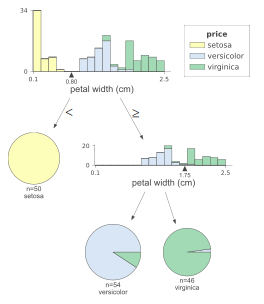

In [12]:
show_iris_dtree()

Now, let's change some colors:

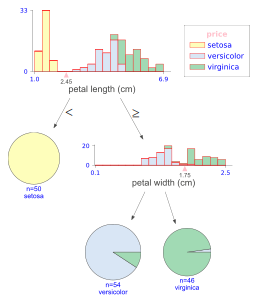

In [13]:
show_iris_dtree(colors={'legend_title':'pink',
                        'rect_edge':'red',
                        'text':'blue',
                        'wedge':'pink',
                        'tick_label':'blue'})

To change the class colors themselves, we have to pass in a color for each class.

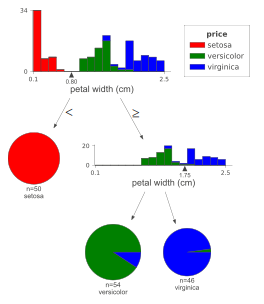

In [14]:
colors_for_up_to_3_classes = [None,  # 0 classes
                              None,  # 1 class
                              None,  # 2 classes
                              ['red','green','blue'] # 3 classes
                              ]
show_iris_dtree(colors={'classes':colors_for_up_to_3_classes})

## Big examples demoing all of the various color elements

In [15]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
data_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'testing', 'data'))
img_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'testing', 'samples'))

In [16]:
from sklearn import tree
from sklearn.datasets import load_boston, load_iris, load_diabetes
import dtreeviz.trees
import IPython.display
from IPython.core.display import display, HTML
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [17]:
def save_viz_locally(viz, change):
    if change is None:
        change = {'None': None}
    image_name = 'colors_{}.svg'.format('_'.join(list(change.keys())))
    filename = os.path.join(img_folder, image_name)
    viz.save(filename)
    filename = os.path.join('..', 'testing', 'samples', image_name)
    return filename

In [18]:
RED = '#ff0000'

In [19]:
#data for classifier
classifier = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()
classifier.fit(iris.data, iris.target)

#date for regressor
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

#data for bivar_3D
df_cars = pd.read_csv(os.path.join(data_folder, 'cars.csv'))
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = [2, 1]
X = X.values[:,features]

def change_classifier(colors):
    viz = dtreeviz.trees.dtreeviz(classifier,
                                  iris.data,
                                  iris.target,
                                  target_name='variety',
                                  feature_names=iris.feature_names,
                                  class_names=["setosa", "versicolor", "virginica"],
                                  colors=colors
                                  )

    return viz


def change_regression(colors):
    viz = dtreeviz.trees.dtreeviz(regr,
                                  boston.data,
                                  boston.target,
                                  target_name='price',
                                  feature_names=boston.feature_names,
                                  colors=colors)
    return viz

def change_rtreeviz_bivar_3D(colors):
    features_bivar_3D = ["WGT", "ENG"]
    target_bivar_3D = "MPG"
    bivar_3D = DecisionTreeRegressor(max_depth=4, criterion="mae")
    bivar_3D.fit(X, y)

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111, projection='3d')
    rtreeviz_bivar_3D(bivar_3D,
                 X, y,
                 feature_names=features_bivar_3D,
                 target_name=target_bivar_3D,
                 fontsize=10,
                 elev=30,
                 azim=20,
                 dist=10,
                 show={'splits','title'},
                 colors=colors,
                 ax=ax)
    plt.show()

unchanged
<class 'matplotlib.axes._subplots.AxesSubplot'>


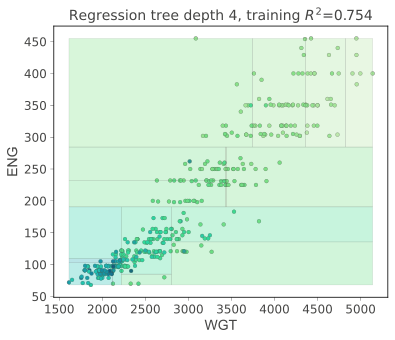

all changes
<class 'matplotlib.axes._subplots.AxesSubplot'>


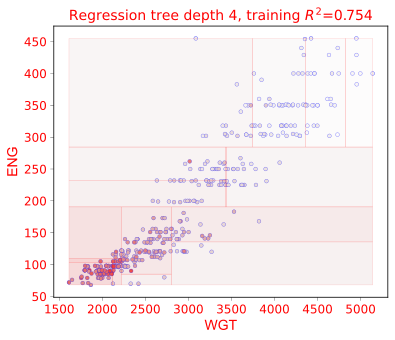

{'tick_label': '#ff0000'}
<class 'matplotlib.axes._subplots.AxesSubplot'>


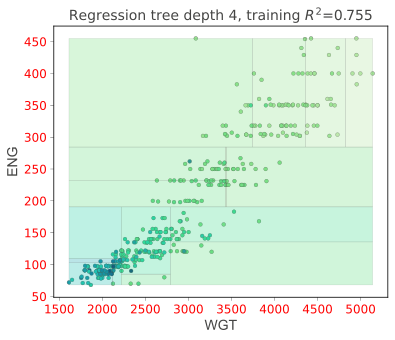

{'title': '#ff0000'}
<class 'matplotlib.axes._subplots.AxesSubplot'>


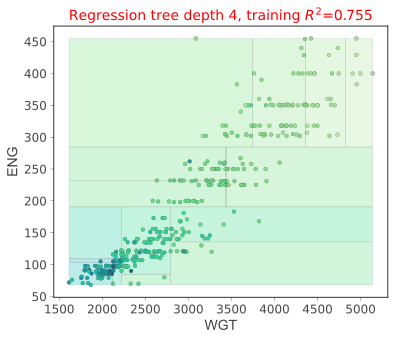

{'axis_label': '#ff0000'}
<class 'matplotlib.axes._subplots.AxesSubplot'>


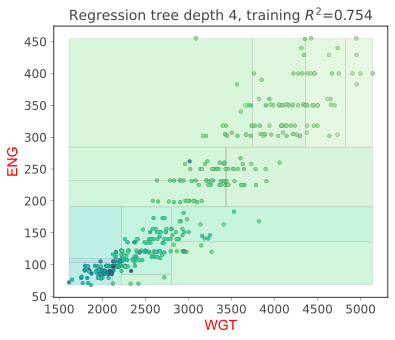

{'color_map_min': '#ffffff'}
<class 'matplotlib.axes._subplots.AxesSubplot'>


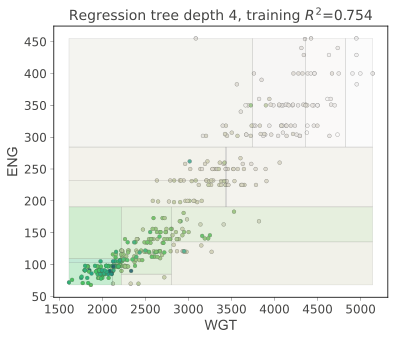

{'color_map_max': '#ff0000'}
<class 'matplotlib.axes._subplots.AxesSubplot'>


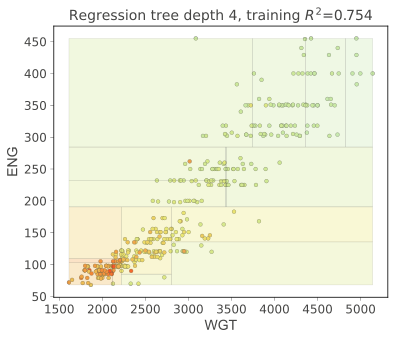

{'edge': '#ff0000'}
<class 'matplotlib.axes._subplots.AxesSubplot'>


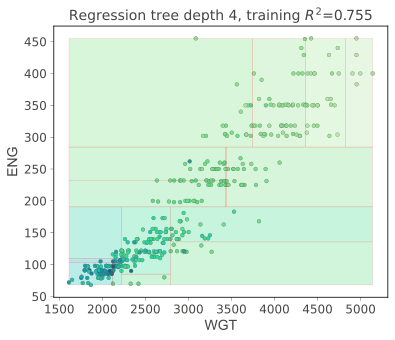

{'scatter_edge': '#0000ff'}
<class 'matplotlib.axes._subplots.AxesSubplot'>


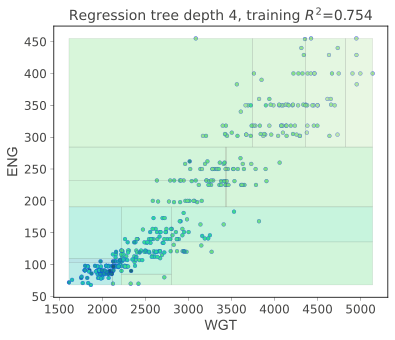

In [20]:
def change_heatmap(colors):
    features_reg_heatmap = ["WGT", "ENG"]
    target_reg_heatmap = "MPG"
    dtr_heatmap = DecisionTreeRegressor(max_depth=4, criterion="mae")
    dtr_heatmap.fit(X, y)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    print(type(ax))
    rtreeviz_bivar_heatmap(dtr_heatmap, X, y, 
                           feature_names=features_reg_heatmap, 
                           target_name=target_reg_heatmap,
                           fontsize=14,
                           colors=colors,
                           ax=ax)
    plt.show()

    
changes = [{'tick_label': RED}, {'title': RED}, {'axis_label': RED},
           {'color_map_min': '#ffffff'}, {'color_map_max': RED}, {'edge': RED}, {'scatter_edge': '#0000ff'}]

print('unchanged')
change_heatmap(None)

print('all changes')
change_heatmap({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_heatmap(change)

unchanged


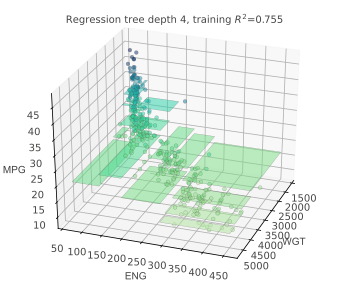

all changes


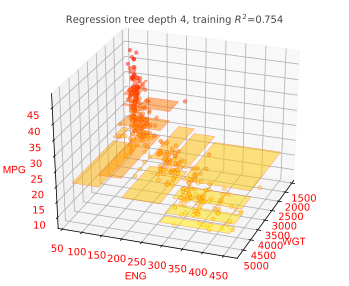

{'scatter_edge': '#ff0000'}


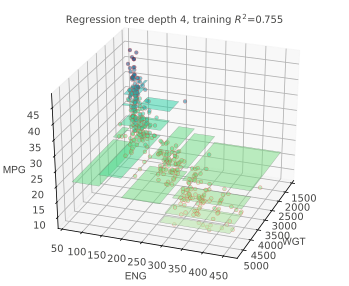

{'tick_label': '#ff0000'}


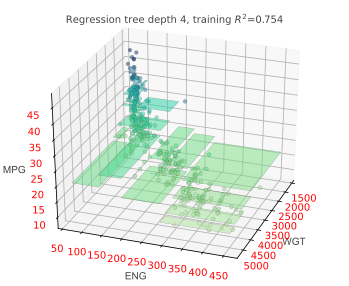

{'axis_label': '#ff0000'}


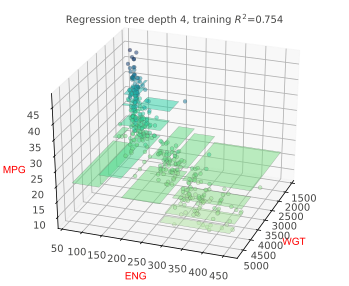

{'edge': '#ff0000'}


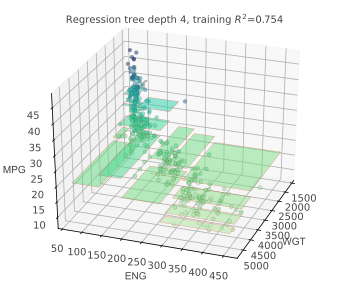

{'color_map_min': '#ff0000'}


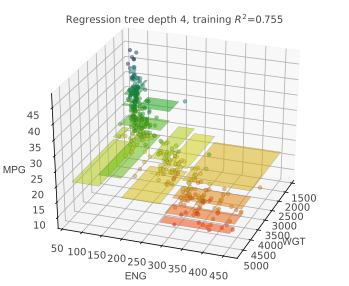

{'color_map_max': '#ff0000'}


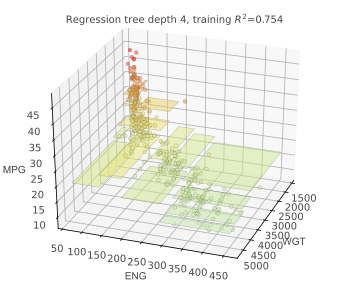

{'color_map_min': '#ffff00', 'color_map_max': '#ff0000'}


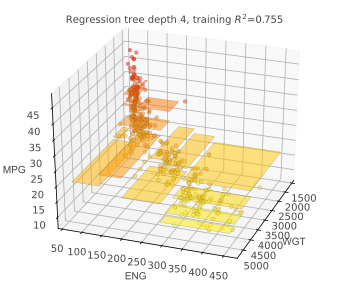

In [21]:
changes = [{'scatter_edge': RED}, {'tick_label': RED}, {'axis_label': '#ff0000'},
           {'edge': '#ff0000'},
           {'color_map_min': RED}, {'color_map_max': RED}, {'color_map_min': '#ffff00', 'color_map_max': RED}]

print('unchanged')
change_rtreeviz_bivar_3D(None)

print('all changes')
change_rtreeviz_bivar_3D({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_rtreeviz_bivar_3D(change)


In [18]:
%config InlineBackend.figure_format = 'png'
changes = {'no changes': None,
           'wedge': {'wedge': RED},
           'split line': {'split_line': RED},
           'markers': {'scatter_marker': RED},
           'split_prev': {'scatter_marker': RED},
           'axis_label': {'axis_label': RED},
           'title': {'title': RED},
           'classes': {'classes':  [
                        None, # 0 classes
                        None, # 1 class
                       ["#FEFEBB","#a1dab4"], # 2 classes
                       ["#ff0000","#00ff00",'#0000ff'], # colors were changed here
                       ["#FEFEBB","#D9E6F5",'#a1dab4','#fee090'], # 4
                       ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                       ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                       ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]},
           'rect_edge': {'rect_edge': RED},
           'text': {'text': RED},
           'text_wedge': {'text_wedge': RED},
           'arrow': {'arrow': '#ff0000'},
           'tick_label': {'tick_label': RED},
           'legend_edge': {'legend_edge': RED},
           'pie': {'pie': RED},
           }

regression_changes = ['no changes', 'wedge', 'split line', 'markers', 'axis_label',
                      'arrow', 'tick_label']
classifier_changes = ['no changes', 'wedge', 'text_wedge', 'classes', 'title', 'text', 
                      'rect_edge', 'pie']

html = []

for f, relevant_changes in zip((change_regression, change_classifier),
                               (regression_changes, classifier_changes)):
    for change in relevant_changes:
        viz = f(changes[change])
        filename = save_viz_locally(viz, changes[change]).replace('\\', '/')
        html.append(f'<div>{change}<img src="{filename}?sanitize=True)"/></div>')
        
IPython.display.HTML('<hr>'.join(html))

In [19]:
X_train, y_train = df_cars.drop('MPG', axis=1), df_cars['MPG']

def change_rtree(colors):
    features_univar = ["WGT"]
    target_univar = "MPG"
    dtr_univar = DecisionTreeRegressor(max_depth=2, criterion="mae")
    dtr_univar.fit(X_train[features_univar], y_train)

    fig = plt.figure()
    ax = fig.gca()
    dtreeviz.trees.rtreeviz_univar(dtr_univar, 
                                   X_train[features_univar], 
                                   y_train, features_univar, target_univar, 
                                   fontsize=14,
                                   colors=colors,
                                   ax=ax)
    plt.show()

No changes


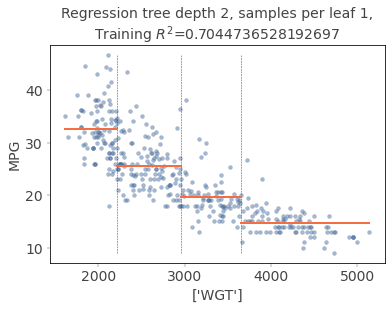

all changes


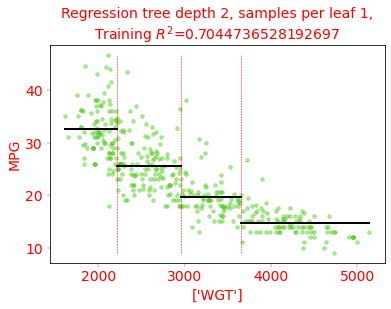

scatter_marker #00ff00


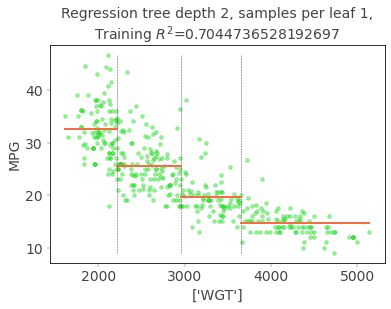

scatter_edge #ff0000


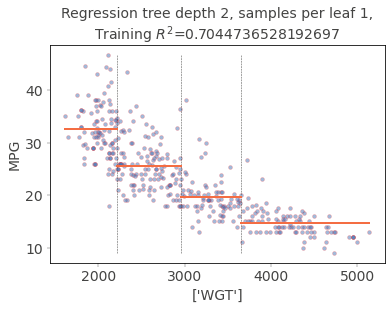

mean_line #000000


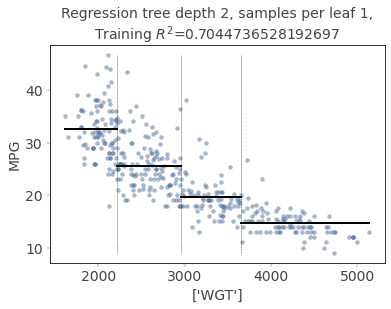

split_line #ff0000


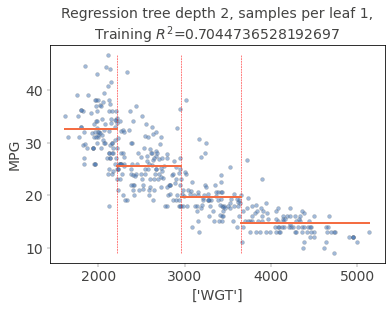

axis_title #ff0000


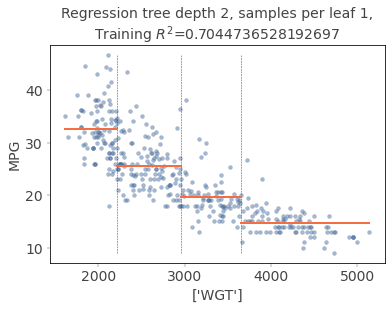

tick_label #ff0000


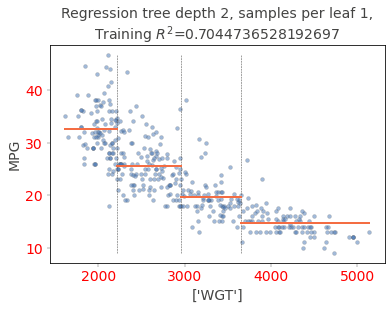

axis_label #ff0000


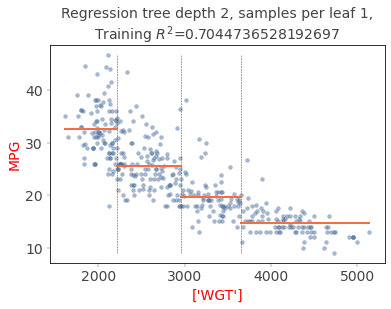

title #ff0000


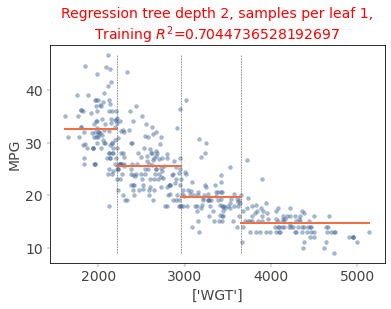

In [22]:
changes = {'scatter_marker': '#00ff00', 'scatter_edge': '#ff0000', 'mean_line': '#000000',
           'split_line': '#ff0000', 'axis_title': '#ff0000', 'tick_label': '#ff0000', 'axis_label': '#ff0000',
           'title': '#ff0000'}

print('No changes')
change_rtree(None)
print('all changes')
change_rtree(changes)
for k, v in changes.items():
    print(k, v)
    change_rtree({k: v})

no changes


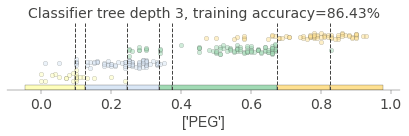

all changes


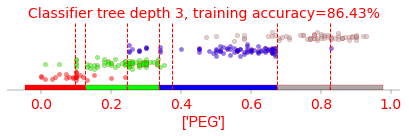

{'title': '#ff0000'}


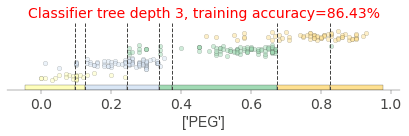

{'axis_label': '#ff0000'}


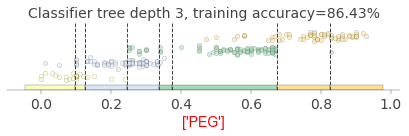

{'tick_label': '#ff0000'}


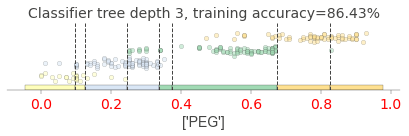

{'edge': '#ff0000'}


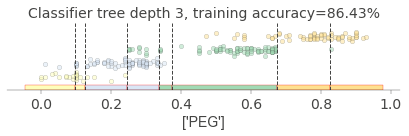

{'scatter_edge': '#ff0000'}


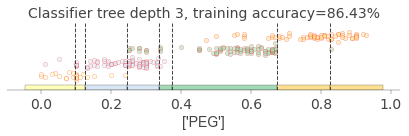

{'split_line': '#ff0000'}


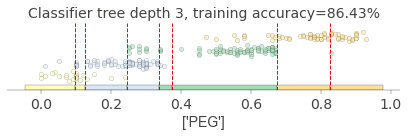

{'classes': [None, None, ['#FEFEBB', '#a1dab4'], ['#FEFEBB', '#D9E6F5', '#a1dab4'], ['#ff0000', '#00ff00', '#0000ff', '#aaaaaa'], ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', '#fee090'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#2c7fb8', '#fee090', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#7fcdbb', '#41b6c4', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#edf8b1', '#c7e9b4', '#7fcdbb', '#1d91c0', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43', '#d73027']]}


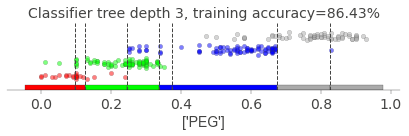

In [24]:
know = pd.read_csv(os.path.join(data_folder, 'knowledge.csv'))
feature_univar = ["PEG"]
target_univar = "UNS"
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

x_train = know[feature_univar]
y_train = know[target_univar]
dtc_univar = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
dtc_univar.fit(x_train, y_train)


def change_ctreeviz_univar(colors):
    
    fig, ax = plt.subplots(1, 1, figsize=(6,2))
    dtreeviz.trees.ctreeviz_univar(dtc_univar, x_train, y_train, 
                                  feature_names=feature_univar, target_name=target_univar, 
                                  class_names=class_names,
                                  nbins=40, gtype='strip',
                                  show={'splits','title'},
                                  colors=colors,
                                  ax=ax)
    plt.tight_layout()
    plt.show()


print('no changes')
change_ctreeviz_univar(None)

changes = [{'title': RED}, {'axis_label': RED}, {'tick_label': RED}, {'edge': RED},
           {'scatter_edge': RED}, {'split_line': RED},
           {'classes':  [None, # 0 classes
                         None, # 1 class
                         ["#FEFEBB","#a1dab4"], # 2 classes
                         ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
                         ["#ff0000","#00ff00",'#0000ff', '#aaaaaa'], # colors were changed here                   
                         ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                         ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                         ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]}
          ]

print('all changes')
change_ctreeviz_univar({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_ctreeviz_univar(change)

In [26]:
features=[4,3]
X_train = know.drop('UNS', axis=1)
y_train = know['UNS']
X_train = X_train.values[:, features]

dtc_bivar = DecisionTreeClassifier(max_depth=3)
dtc_bivar.fit(X_train, y_train)

def change_ctreeviz_bivar(colors):
    fig, ax = plt.subplots(1, 1, figsize=(6,5))
    dtreeviz.trees.ctreeviz_bivar(dtc_bivar, X_train, y_train, 
                                 feature_names=['PEG','LPR'], target_name="Knowledge", 
                                 class_names=class_names,
                                 colors=colors,
                                 ax=ax)
    plt.tight_layout()
    plt.show()

no changes


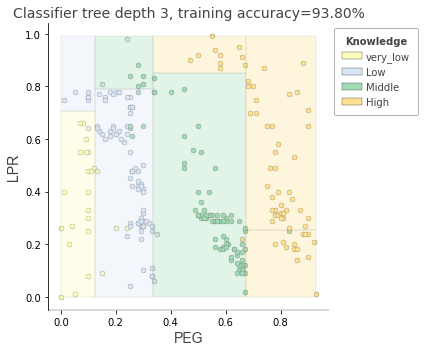

all changes


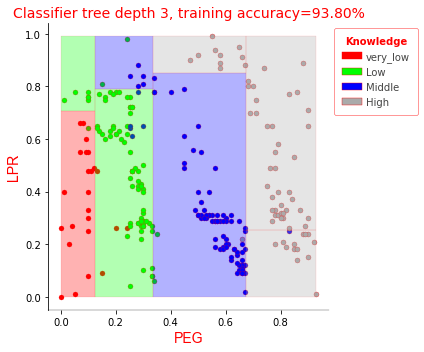

{'title': '#ff0000'}


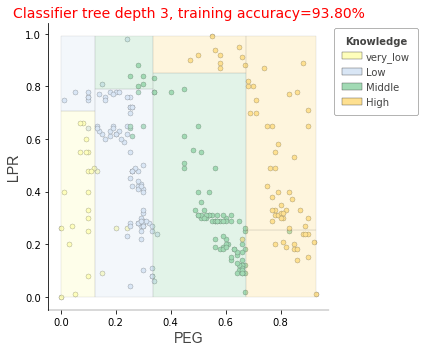

{'axis_label': '#ff0000'}


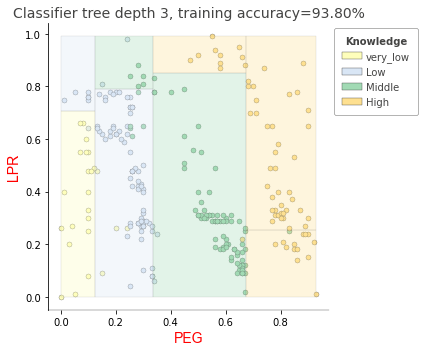

{'tick_label': '#ff0000'}


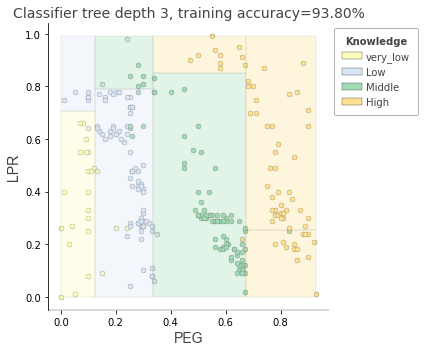

{'rect_edge': '#ff0000'}


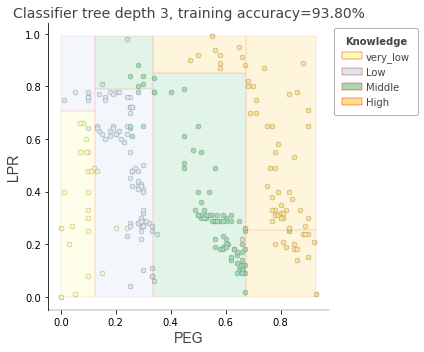

{'legend_edge': 'RED'}


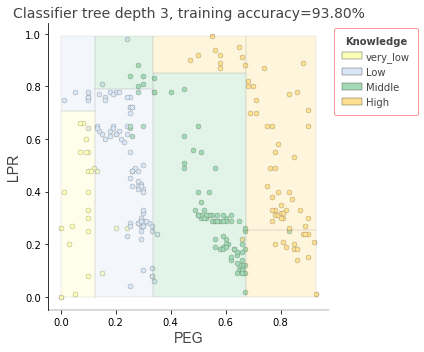

{'legend_title': 'RED'}


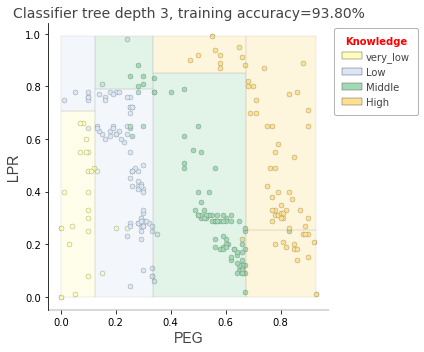

{'scatter_edge': '#ff0000'}


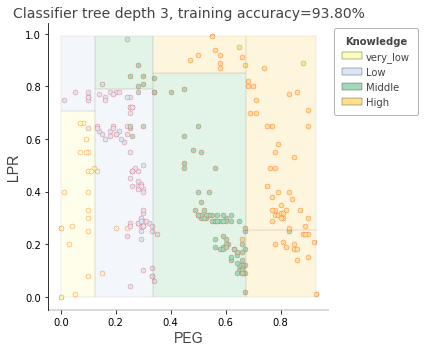

{'classes': [None, None, ['#FEFEBB', '#a1dab4'], ['#FEFEBB', '#D9E6F5', '#a1dab4'], ['#ff0000', '#00ff00', '#0000ff', '#aaaaaa'], ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', '#fee090'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#2c7fb8', '#fee090', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#7fcdbb', '#41b6c4', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#edf8b1', '#c7e9b4', '#7fcdbb', '#1d91c0', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43', '#d73027']]}


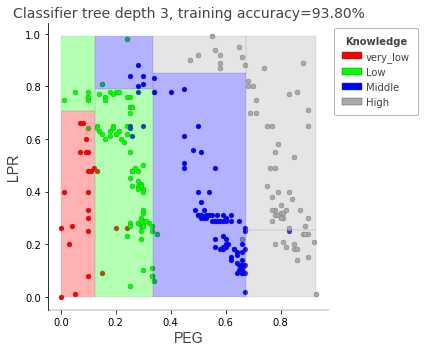

In [27]:
changes = [{'title': RED}, {'axis_label': RED}, {'tick_label': RED}, {'rect_edge': RED},
           {'legend_edge': 'RED'}, {'legend_title': 'RED'},
           {'scatter_edge': RED}, 
           {'classes':  [None, # 0 classes
                         None, # 1 class
                         ["#FEFEBB","#a1dab4"], # 2 classes
                         ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
                         ["#ff0000","#00ff00",'#0000ff', '#aaaaaa'], # colors were changed here                   
                         ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                         ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                         ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]}
          ]

print('no changes')
change_ctreeviz_bivar(None)

print('all changes')
change_ctreeviz_bivar({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_ctreeviz_bivar(change)

In [28]:
regr = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree
diabetes = load_diabetes()
regr.fit(diabetes.data, diabetes.target)
X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]  # random sample from training

def change_dtreeviz(colors):
    return dtreeviz.trees.dtreeviz(regr,
                                   diabetes.data, 
                                   diabetes.target, 
                                   target_name='value', 
                                   orientation ='LR',  # left-right orientation
                                   feature_names=diabetes.feature_names,
                                   X=X,  # need to give single observation for prediction
                                   colors=colors)           


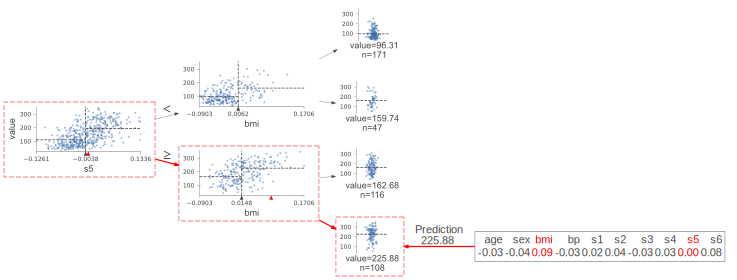

In [29]:
change_dtreeviz({'highlight': RED})

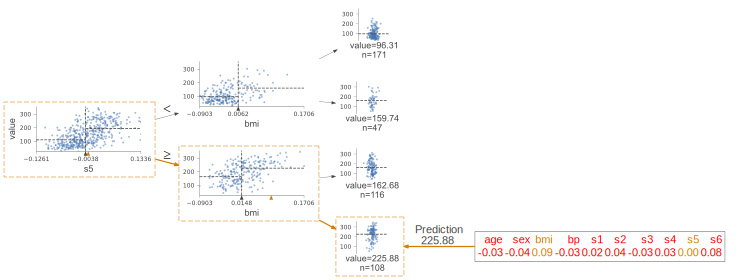

In [30]:
change_dtreeviz({'text': RED})

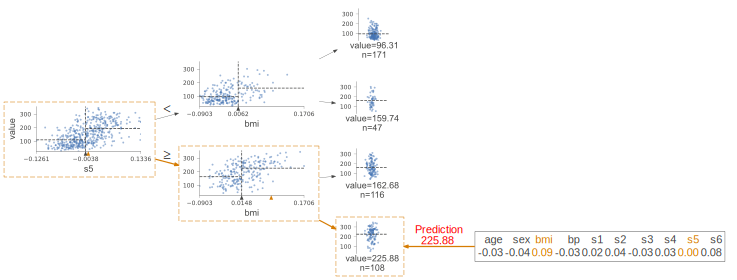

In [31]:
change_dtreeviz({'leaf_label': RED})

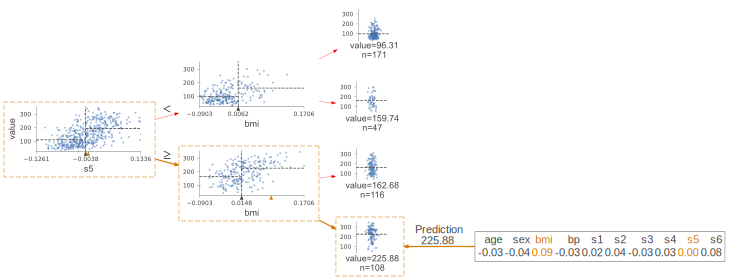

In [32]:
change_dtreeviz({'arrow': RED})